### Import Essential Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

In [2]:
df = pd.read_csv('dataset_sdn.csv')
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


### Data Preprocessing

#### Dataset Dimensions

In [3]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 23 columns


#### Concise summary of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

#### Descriptive statistics of dataset

In [5]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


#### heatmap of missing values

<Axes: >

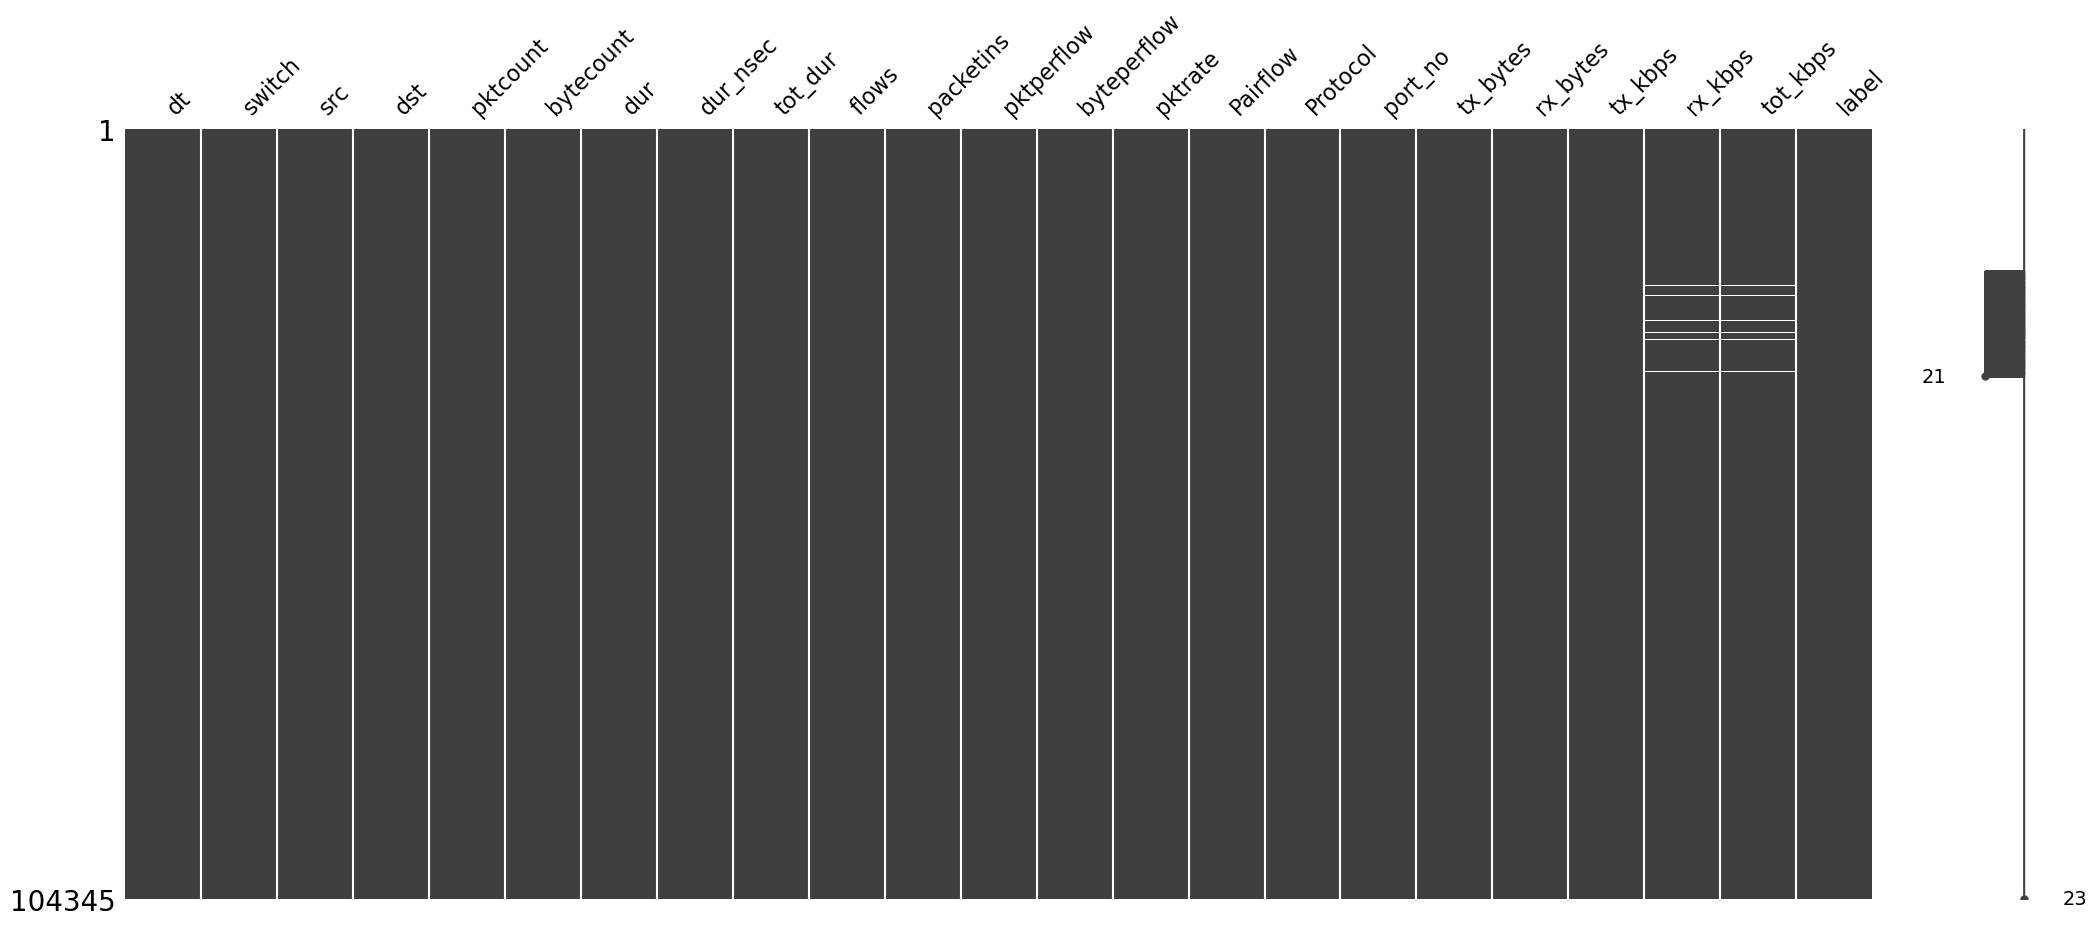

In [6]:
msno.matrix(df)

#### Count of null values in each feature 

In [7]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [8]:
(df.isnull().sum()/df.isnull().count())*100

dt             0.00000
switch         0.00000
src            0.00000
dst            0.00000
pktcount       0.00000
bytecount      0.00000
dur            0.00000
dur_nsec       0.00000
tot_dur        0.00000
flows          0.00000
packetins      0.00000
pktperflow     0.00000
byteperflow    0.00000
pktrate        0.00000
Pairflow       0.00000
Protocol       0.00000
port_no        0.00000
tx_bytes       0.00000
rx_bytes       0.00000
tx_kbps        0.00000
rx_kbps        0.48493
tot_kbps       0.48493
label          0.00000
dtype: float64

#### Drop rows with null values

In [9]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [10]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
This Dataframe has 103839 rows and 23 columns after removing null values


#### Distribution of Target Class

In [11]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.01 %
Number of DDOS attacks that has not occured : 60.99 %


#### Barplot of Target Class

Text(0, 0.5, 'Frequency %')

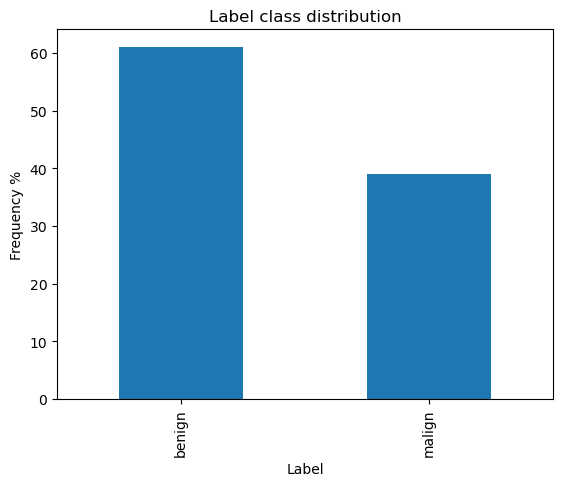

In [12]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Pairplot of select features

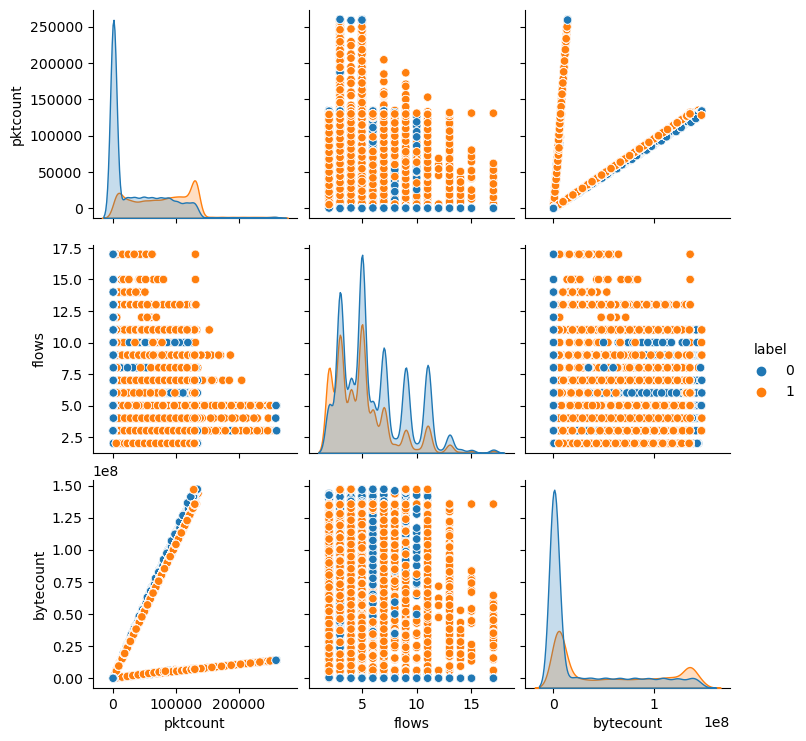

In [13]:
sns.pairplot(df,hue="label",vars=['pktcount','flows','bytecount'])

#### Columns in the dataset

In [14]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [15]:
print(df.apply(lambda col: col.unique()))

dt             [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
src            [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
dst            [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
pktcount       [45304, 126395, 90333, 103866, 85676, 32914, 4...
bytecount      [48294064, 134737070, 96294978, 110721156, 913...
dur            [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
dur_nsec       [716000000, 734000000, 744000000, 747000000, 7...
tot_dur        [101000000000.0, 281000000000.0, 201000000000....
flows          [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins      [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow     [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow    [14428310, 14424046, 14427244, 14426178, 14184...
pktrate        [451, 443, 446, 0, 288, 450, 448, 449, 455, 14...
Pairflow                                                  [0, 1]
Protocol                 

#### Numerical Features

In [16]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [17]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


#### Number of Unique values in the numerical features 

In [18]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

dt               858
switch            10
pktcount        9044
bytecount       9270
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64

#### Discrete numerical features

In [19]:
#discrete numerical features 
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [20]:
df[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,3,0,3
1,1,2,0,4
2,1,3,0,1
3,1,3,0,2
4,1,3,0,3
5,1,3,0,1
6,1,3,0,4
7,1,3,0,1
8,1,3,0,2
9,1,3,0,4


#### Continuous features

In [21]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 15 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


#### Visualize the distribution of continuous features wrt packet count, protocol and type of attack

<Figure size 2000x2000 with 0 Axes>

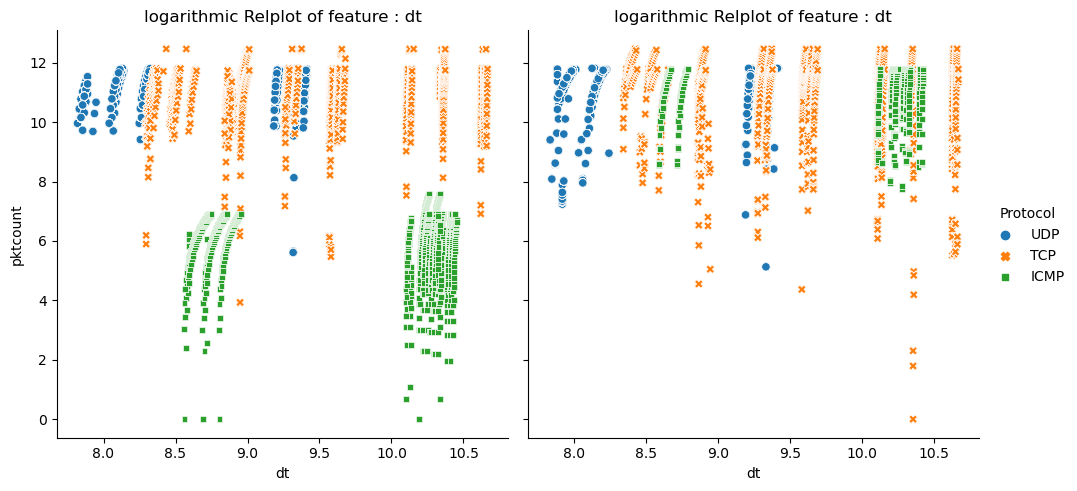

<Figure size 2000x2000 with 0 Axes>

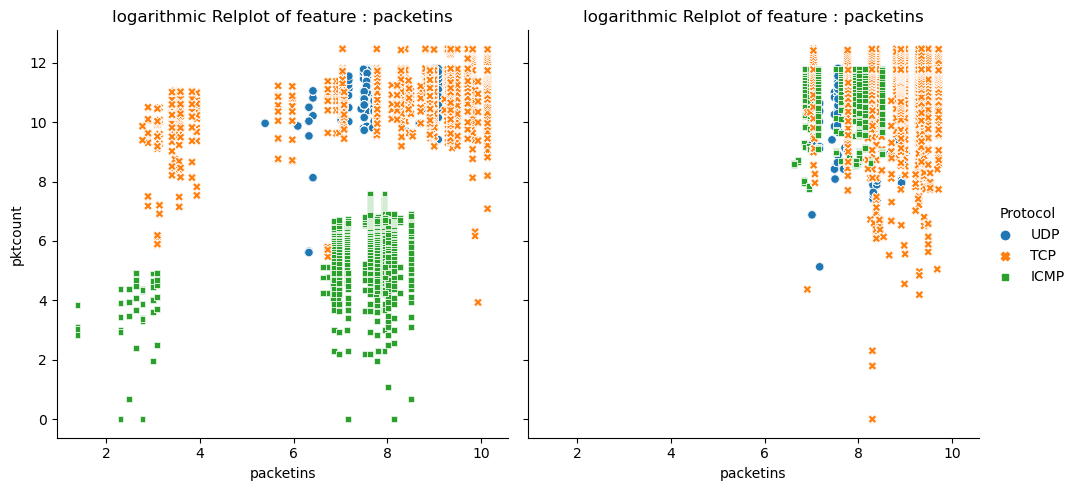

<Figure size 2000x2000 with 0 Axes>

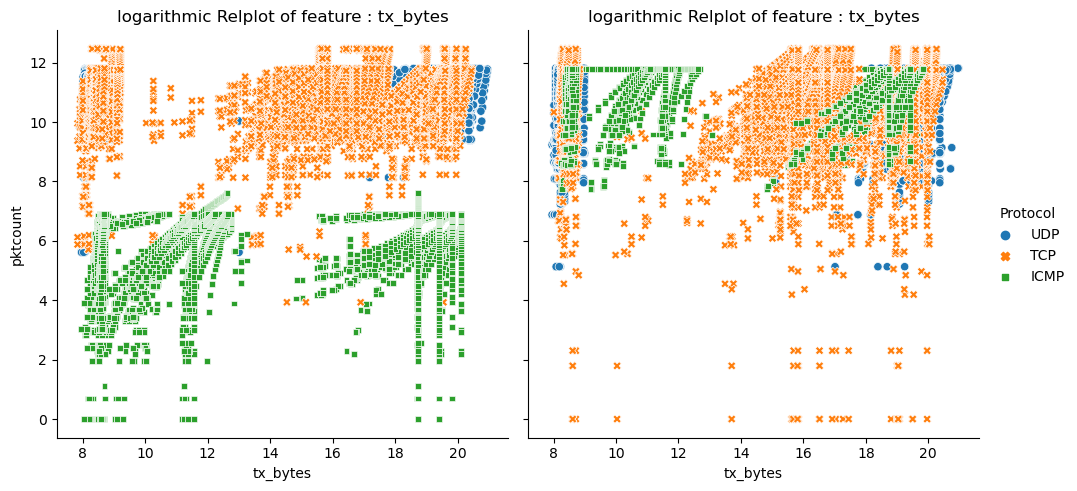

<Figure size 2000x2000 with 0 Axes>

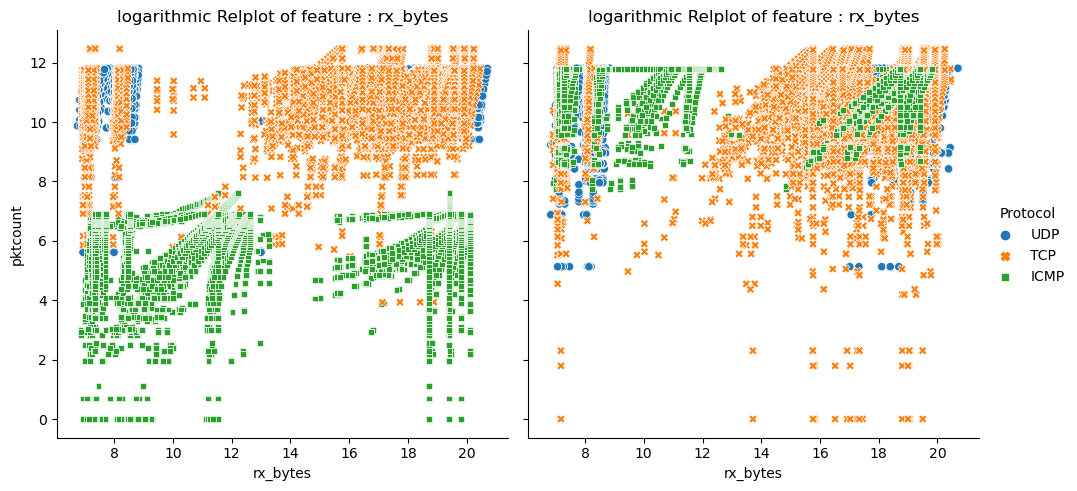

In [22]:
## Relplot of log(variable)
import warnings
warnings.filterwarnings("ignore")
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['pktcount']=np.log(data['pktcount'])
        plt.figure(figsize=(20,20))
        sns.relplot(data=data, x=data[feature],y=data['pktcount'],hue="Protocol",style="Protocol",
                    col="label",kind="scatter").set(title="logarithmic Relplot of feature : " + feature)

#### Visualize the distribution of numerical discrete features

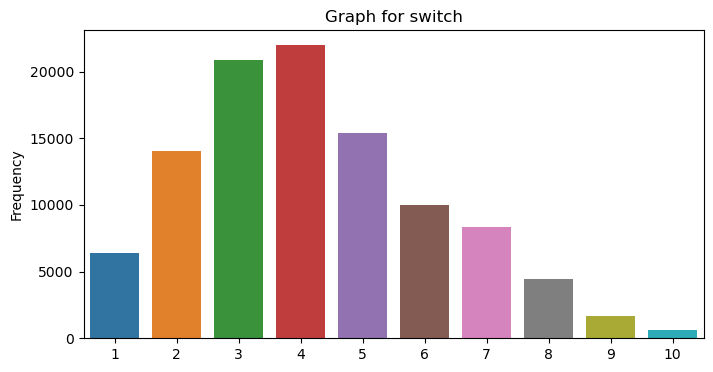

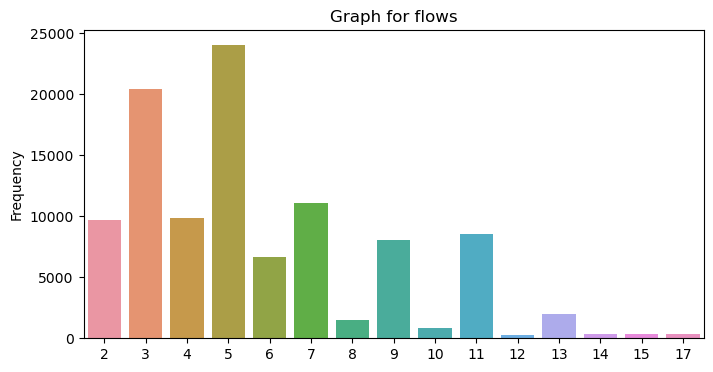

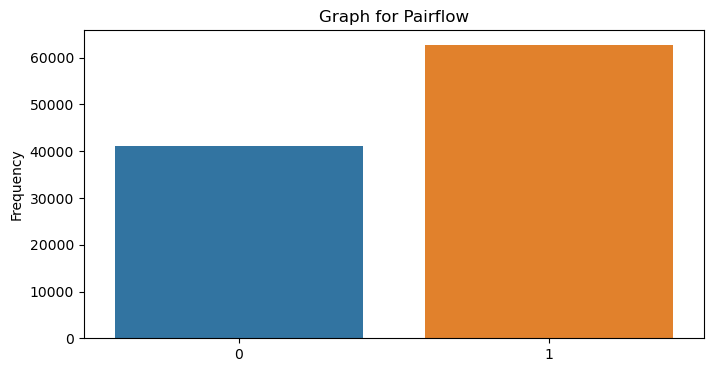

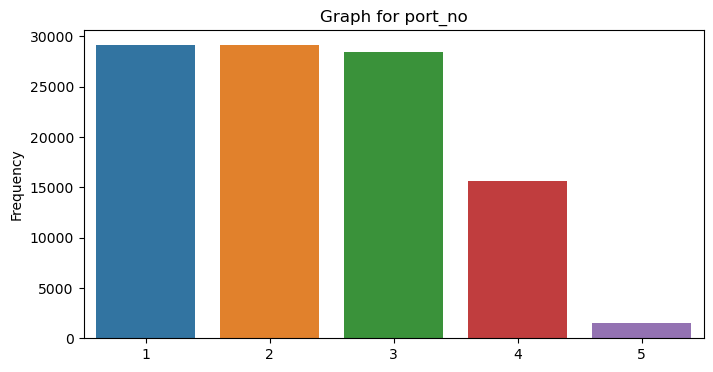

In [23]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [24]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

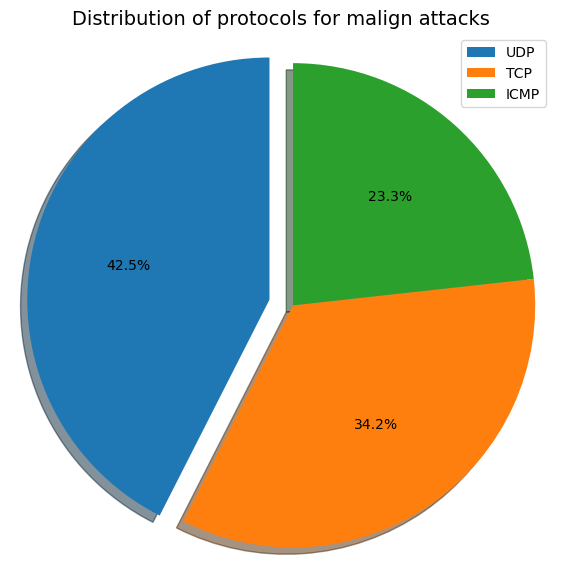

In [25]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

Text(0.5, 1.0, 'Boxplot, Packet count for different protocols')

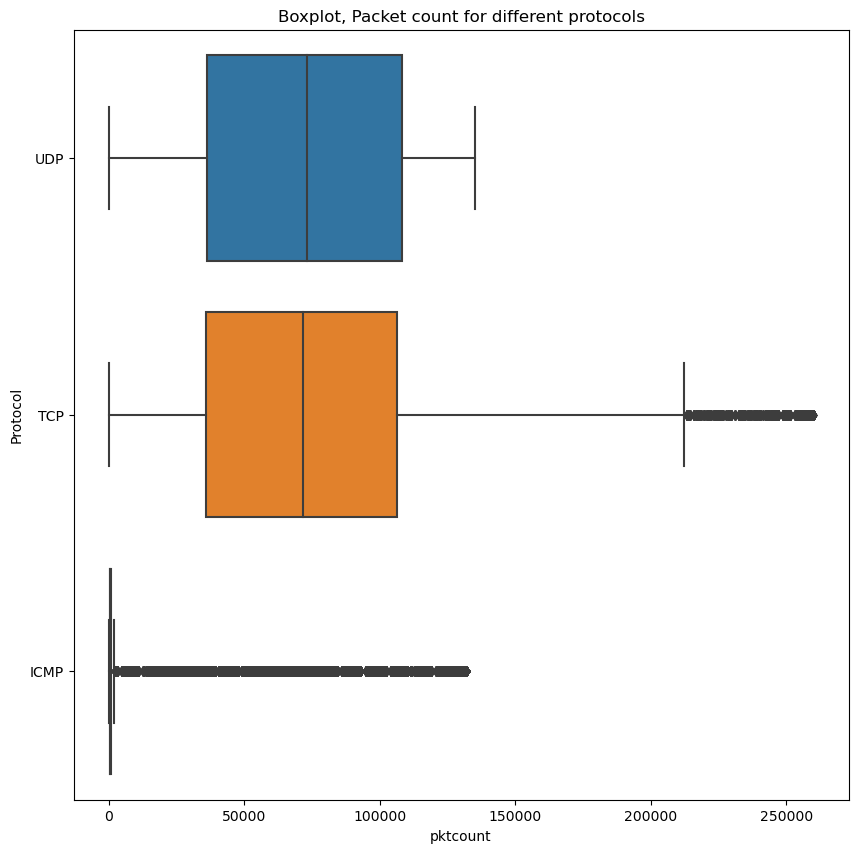

In [26]:
fig, ax = plt.subplots(figsize=[10, 10])
sns.boxplot(
    data=df,
    x='pktcount',
    y='Protocol'
)
ax.set_title('Boxplot, Packet count for different protocols')

#### Heat map of correlation of features

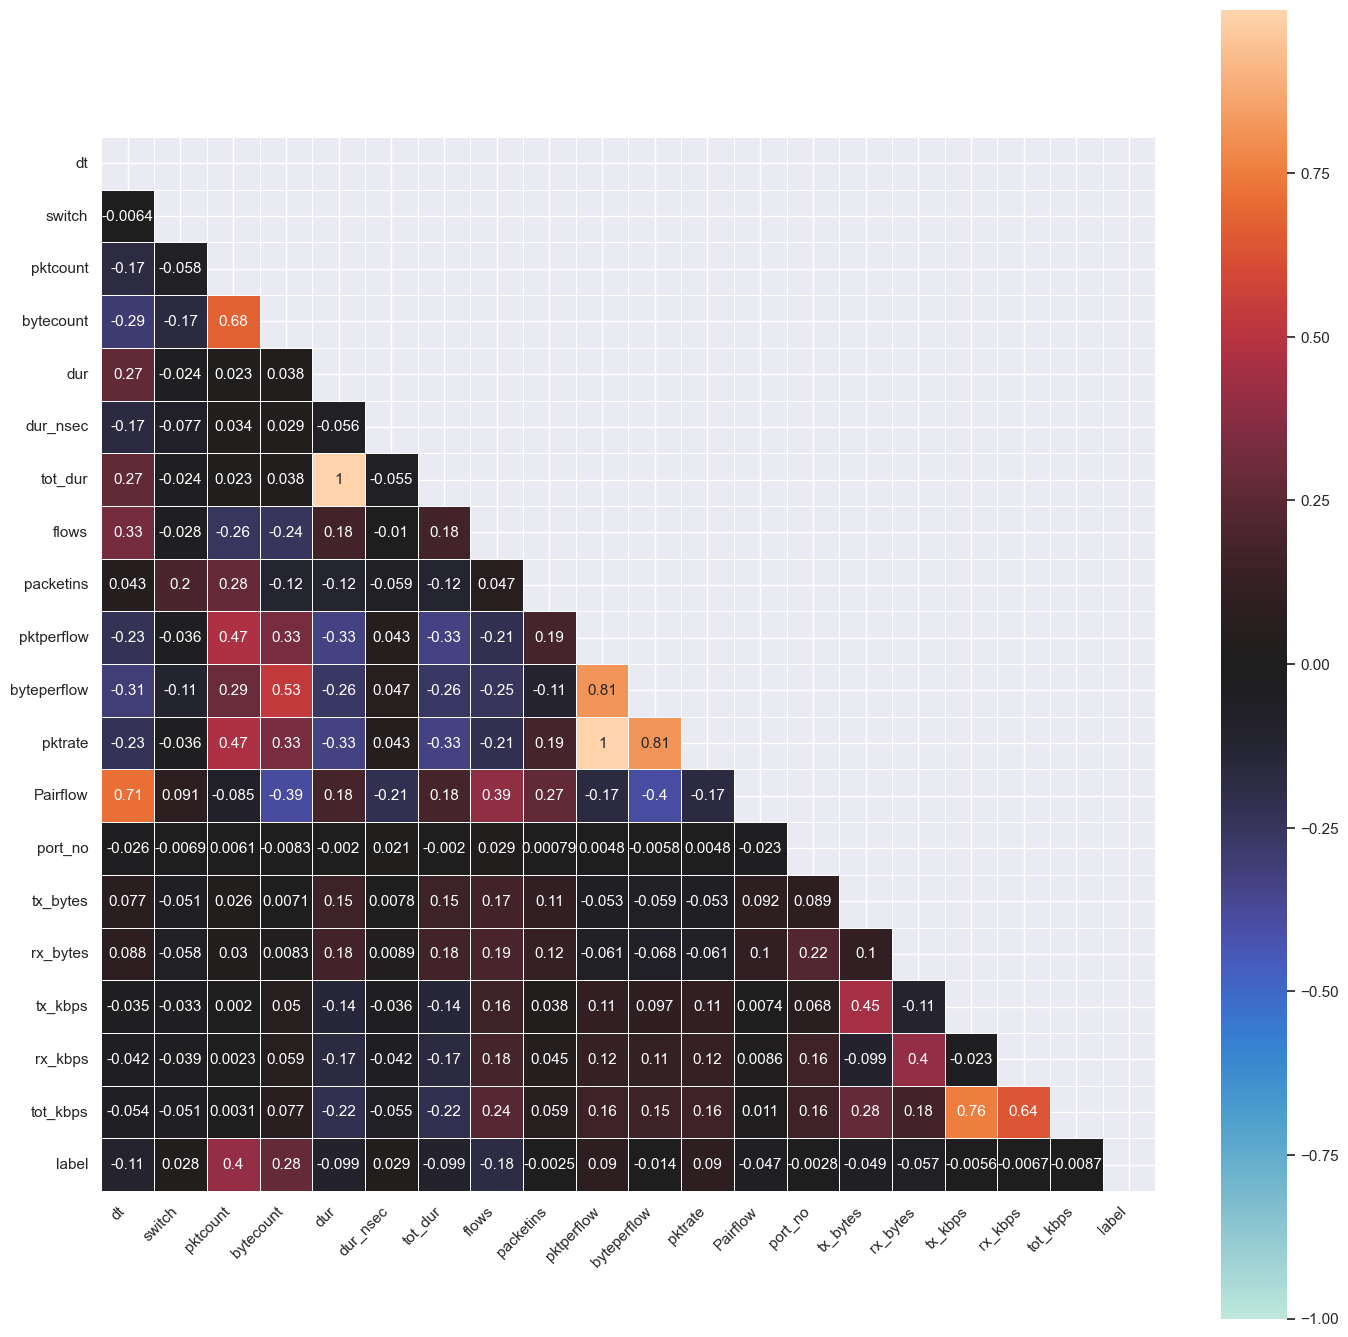

In [27]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(17, 17))
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix, square=True, annot=True, center=0, vmin=-1, linewidths=0.5, annot_kws={"size": 11}, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [28]:
df = df.drop(['src', 'dst', 'dt', 'switch', 'dur_nsec', 'packetins', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps'], axis=1)

In [29]:
## "dur" and "tot_dur"
## "pktperflow" and "pktrate"
#'dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 
#'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'
df = df.drop(['dur', "pktrate", "pktperflow"], axis=1)

In [30]:
df = pd.get_dummies(df)

In [31]:
#dataframe after encoding
df.head(10)

,pktcount,bytecount,tot_dur,flows,byteperflow,rx_kbps,tot_kbps,label,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,45304,48294064,1.010000e+11,3,14428310,0.0,0.0,0,0,0,1
1,126395,134737070,2.810000e+11,2,14424046,0.0,0.0,0,0,0,1
2,90333,96294978,2.010000e+11,3,14427244,0.0,0.0,0,0,0,1
3,90333,96294978,2.010000e+11,3,14427244,0.0,0.0,0,0,0,1
4,90333,96294978,2.010000e+11,3,14427244,0.0,0.0,0,0,0,1
5,90333,96294978,2.010000e+11,3,14427244,0.0,0.0,0,0,0,1
6,45304,48294064,1.010000e+11,3,14428310,0.0,0.0,0,0,0,1
7,45304,48294064,1.010000e+11,3,14428310,0.0,0.0,0,0,0,1
8,45304,48294064,1.010000e+11,3,14428310,0.0,0.0,0,0,0,1
9,90333,96294978,2.010000e+11,3,14427244,0.0,16578.0,0,0,0,1


In [32]:
df.dtypes

pktcount           int64
bytecount          int64
tot_dur          float64
flows              int64
byteperflow        int64
rx_kbps          float64
tot_kbps         float64
label              int64
Protocol_ICMP      uint8
Protocol_TCP       uint8
Protocol_UDP       uint8
dtype: object

In [33]:
# Save the processed dataset to a CSV file
df.to_csv('cleaned_dataset.csv', index=False)

### Split into Independent and dependent variables

In [34]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

### Normalizing features

In [35]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [75-25]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=100)
print(X_train.shape, X_test.shape)

(72687, 10) (31152, 10)


In [37]:
Classifier_accuracy = []

#### SVM Classifier

In [38]:
svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %d" % (accuracy*100) )

Accuracy of SVM Classifier : 91


#### Logistic Regression 

In [39]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %d" % (accuracy*100))

Accuracy of Logistic Regression Classifier : 74


In [40]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Random Forest Classifier : %d" % (accuracy*100))

Accuracy of Random Forest Classifier : 99


### Comparitive analysis of models

In [41]:
Classifier_names = ["RBF_SVM","Logistic Regression","Random Forest"]

In [42]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

,name,Accuracy
2,Random Forest,99.601952
0,RBF_SVM,91.474063
1,Logistic Regression,74.964689


#### Visualize accuracies of the models

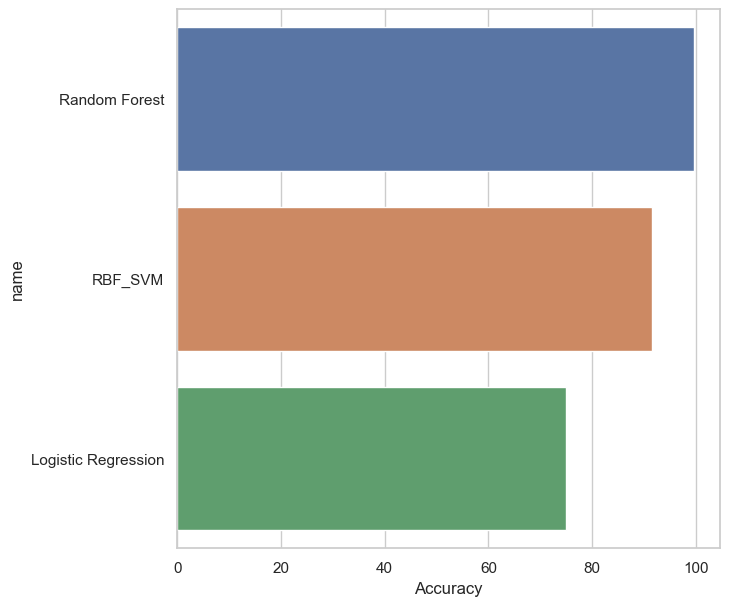

In [43]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)

## Plotting Confusion Matrix

In [44]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] 
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

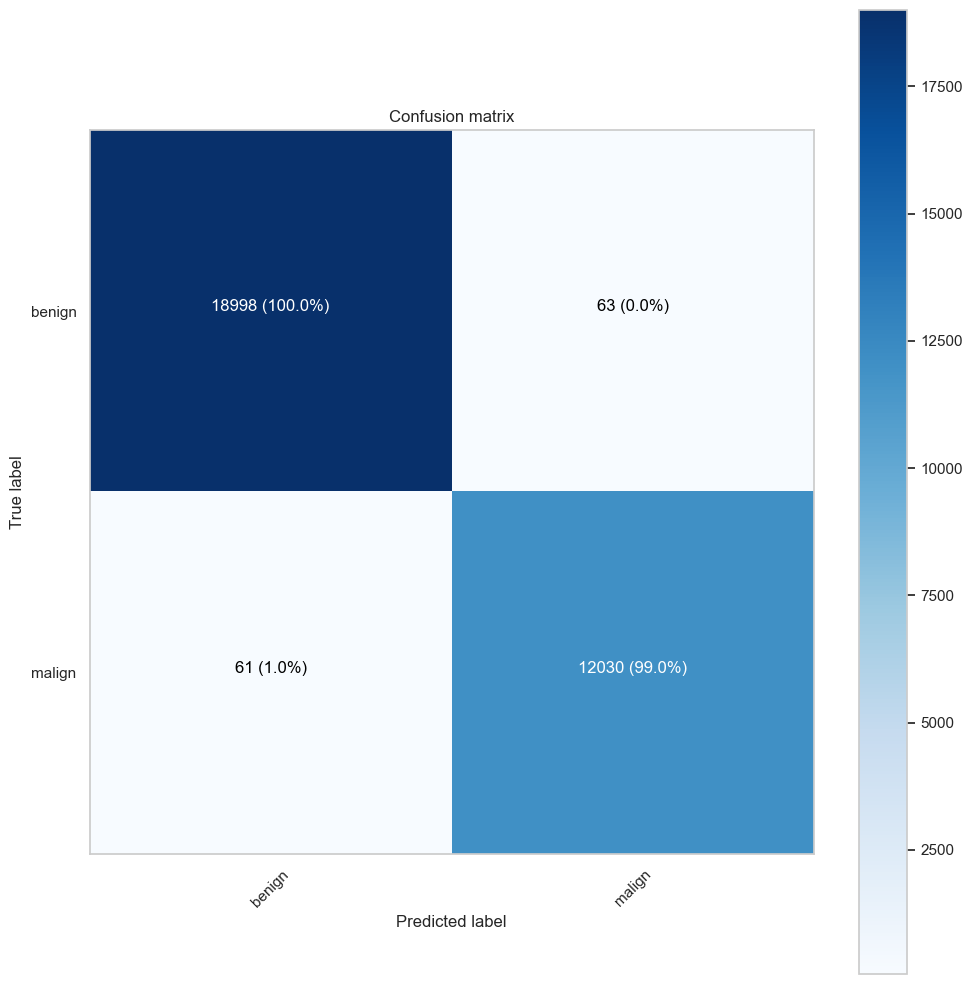

In [45]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = labels)

In [46]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [47]:
import joblib
# Save the model to a pickle file
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
import tkinter as tk
from tkinter import ttk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the trained Random Forest model
model = joblib.load('random_forest_model.pkl')

# Check the number of features in your trained model
num_features_in_model = len(model.feature_importances_)

# Create a list of feature names that match your model's expectations
expected_features = ['pktcount', 'bytecount', 'tot_dur', 'flows', 'byteperflow', 'rx_kbps', 'tot_kbps',
                      'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP']

# Define a function to make predictions
def make_prediction():
    try:
        pktcount = float(pktcount_entry.get())
        bytecount = float(bytecount_entry.get())
        tot_dur = float(tot_dur_entry.get())
        flows = float(flows_entry.get())
        byteperflow = float(byteperflow_entry.get())
        rx_kbps = float(rx_kbps_entry.get())
        tot_kbps = float(tot_kbps_entry.get()) 
        Protocol_ICMP = int(protocol_icmp_var.get())  # Get the selected value for Protocol_ICMP
        Protocol_TCP = int(protocol_tcp_var.get())  # Get the selected value for Protocol_TCP
        Protocol_UDP = int(protocol_udp_var.get())  # Get the selected value for Protocol_UDP
        
        # Create a DataFrame from user input
        user_input = pd.DataFrame({
            'pktcount': [pktcount],
            'bytecount': [bytecount],
            'tot_dur': [tot_dur],
            'flows': [flows],
            'byteperflow': [byteperflow],
            'rx_kbps': [rx_kbps],
            'tot_kbps': [tot_kbps],
            'Protocol_ICMP': [Protocol_ICMP],
            'Protocol_TCP': [Protocol_TCP],
            'Protocol_UDP': [Protocol_UDP]    
           })

        # Check if the number of features in user_input matches the model's expectations
        if len(user_input.columns) != num_features_in_model:
            raise ValueError(f"Model expects {num_features_in_model} features but received {len(user_input.columns)}.")

        # Standardize the user input
        scaler = MinMaxScaler()
        user_input_scaled = scaler.fit_transform(user_input)
        print(user_input_scaled)
        # Make a prediction
        #y_pred = svc_clf.predict(X_test)
        prediction =svc_clf.predict(user_input_scaled)
            # Print input values for debugging
        print("Input Values:")
        print(user_input)

        # Determine the class label based on the prediction
        if prediction[0] == 0:
            result = "Benign"
        else:
            result = "Malign"

        result_label.config(text=f"Prediction: {result}")
    except Exception as e:
        result_label.config(text=f"Error: {str(e)}")
        
# Create the main window
window = tk.Tk()
window.title("DDoS Attack Detection")

frame = ttk.Frame(window)
frame.grid(row=0, column=0, padx=10, pady=10)

# Input fields and labels
ttk.Label(frame, text="Packet Count:").grid(row=0, column=0)
pktcount_entry = ttk.Entry(frame)
pktcount_entry.grid(row=0, column=1)

ttk.Label(frame, text="Byte Count:").grid(row=5, column=0)
bytecount_entry = ttk.Entry(frame)
bytecount_entry.grid(row=5, column=1)

ttk.Label(frame, text="Total Duration (seconds):").grid(row=6, column=0)
tot_dur_entry = ttk.Entry(frame)
tot_dur_entry.grid(row=6, column=1)

ttk.Label(frame, text="Flows:").grid(row=4, column=0)
flows_entry = ttk.Entry(frame)
flows_entry.grid(row=4, column=1)

ttk.Label(frame, text="Byte per Flow:").grid(row=1, column=0)
byteperflow_entry = ttk.Entry(frame)
byteperflow_entry.grid(row=1, column=1)

ttk.Label(frame, text="RX KBps:").grid(row=3, column=0)
rx_kbps_entry = ttk.Entry(frame)
rx_kbps_entry.grid(row=3, column=1)

ttk.Label(frame, text="Total KBps:").grid(row=2, column=0)
tot_kbps_entry = ttk.Entry(frame)
tot_kbps_entry.grid(row=2, column=1)

# Add input fields and labels for other features, including Protocol_TCP, Protocol_ICMP, and Protocol_UDP
ttk.Label(frame, text="Protocol_ICMP:").grid(row=8, column=0)
protocol_icmp_var = tk.StringVar()
protocol_icmp_combobox = ttk.Combobox(frame, textvariable=protocol_icmp_var, values=["0", "1"])
protocol_icmp_combobox.grid(row=8, column=1)

ttk.Label(frame, text="Protocol_TCP:").grid(row=7, column=0)
protocol_tcp_var = tk.StringVar()
protocol_tcp_combobox = ttk.Combobox(frame, textvariable=protocol_tcp_var, values=["0", "1"])
protocol_tcp_combobox.grid(row=7, column=1)

ttk.Label(frame, text="Protocol_UDP:").grid(row=9, column=0)
protocol_udp_var = tk.StringVar()
protocol_udp_combobox = ttk.Combobox(frame, textvariable=protocol_udp_var, values=["0", "1"])
protocol_udp_combobox.grid(row=9, column=1)

# Button to make a prediction (same as before)
predict_button = ttk.Button(frame, text="Predict", command=make_prediction)
predict_button.grid(row=10, columnspan=2)

# Label to display the prediction result (same as before)
result_label = ttk.Label(frame, text="")
result_label.grid(row=11, columnspan=2)

window.mainloop()